<a href="https://colab.research.google.com/github/PUNEETSUBHANJI/Exploratory-Data-Analysis-of-churn-dataset/blob/main/EDA_Telecom_Churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis of churn dataset

#***Problem Statement***

#**Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.**
#**Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.** 

#**Loading Data and Importing Modules**

In [46]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [48]:
#Loading the Data
tele_churn_df = pd.read_csv('/content/drive/MyDrive/Projects- Almabetter_Puneet/EDA Telecom Churn Analysis - Puneet Subhanji/Telecom Churn.csv')

#**Information About The Data**

In [49]:
#display first 5 index of the dataset
tele_churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [50]:
#display last 5 index of the dataset
tele_churn_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [51]:
#shape of a given data frame
#below given code return a tuple representing the dimensionality of the data frame
tele_churn_df.shape

(3333, 20)

In [52]:
#type of data in each column(in given dataset)
tele_churn_df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


State: States name(in code).

Account Length: period for which the Account is active.

Area Code: Area code having States

International Plan: Yes: Means International Plan is subscribed and ,No: Means the customer has not subscribed for international plan.

Voice Mail Plan: Yes: Voice Mail Plan is subscribed, No: voice mail Plan is not subscribed by the customer

Number vmail messages: Number of Voice Mail Messages

Total day minutes: Total Number of Minutes Spent in Morning

Total day calls: Total Number of Calls made in Morning.

Total day charge: Total Charge for all call made in Morning.

Total eve minutes: Total Number of Minutes Spent in Evening

Total eve calls: Total Number of Calls made in Evening.

Total eve charge: Total Charge for all the call made in Evening.

Total night minutes: Total Number of Minutes Spent in the Night.

Total night calls: Total Number of Calls made in Night.

Total night charge: Total Charge for call made in Night.

Total intl minutes: Total Number of minutes spent in international calls.

Total intl calls: Total Number of call made internationally.

Total intl charge: Total charge for all the international call.

Customer service calls : Number of customer service calls made by customer

Churn Customer Churn, True :churned customer False:means retained customer

In [53]:
#information about the given churn dataset and its columns
tele_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

#***Checking for Missing And Duplicate values***

In [54]:
''' To Checking the sum of Missing/null values,if present any we can replace or 
delete those null value'''
tele_churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#***No missing value present.Hence, no need to do the missing value imputation***

In [55]:
#Descriptive Analysis of given Dataset
tele_churn_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#***Churn***

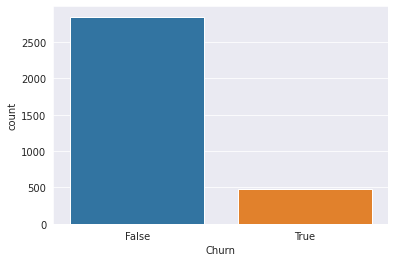

In [56]:
# pictorial representation of churn column 
sns.countplot(x = tele_churn_df.Churn)

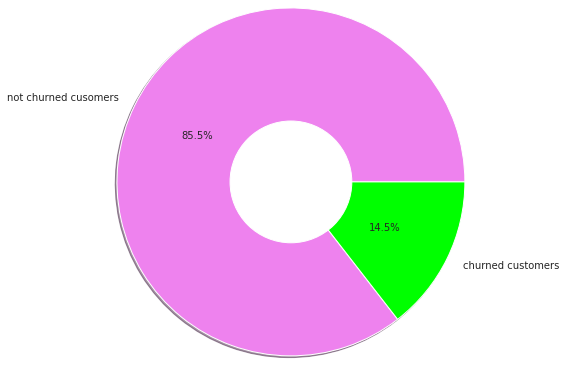

In [57]:
# Donut chart of churn column(in percentage)
data = tele_churn_df['Churn'].value_counts()
plt.pie(data, autopct = '%1.1f%%', shadow = True, radius = 2,
        labels= ['not churned cusomers','churned customers'],
        colors = ['violet','lime'])
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [58]:
tele_churn_df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

##By Analyzing the churn column, we can say that 14.5% of customers have churned.

#***As we proceed further, lets see what kind of correlation does other factors/column label/variable has with churn***

#***States and Area code***

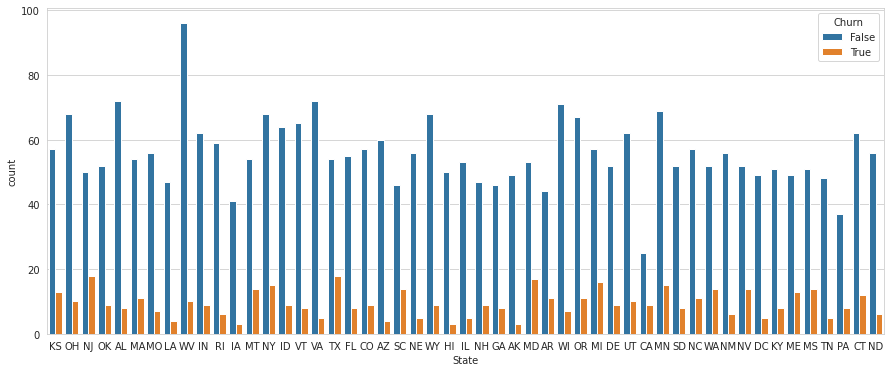

In [59]:
#statewise data regarding the no. of churned and not churned customers
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
ax = sns.countplot(x = 'State', hue = 'Churn', data = tele_churn_df)
plt.show()

In [60]:
#percent of customers churned out of total customer statewise
States_data = pd.crosstab(tele_churn_df['State'],tele_churn_df['Churn'])
States_data['Churn_%'] = States_data.apply(lambda x : x[1]*100/(x[0]+x[1]),
                                         axis = 1)
print(States_data)

Churn  False  True    Churn_%
State                        
AK        49     3   5.769231
AL        72     8  10.000000
AR        44    11  20.000000
AZ        60     4   6.250000
CA        25     9  26.470588
CO        57     9  13.636364
CT        62    12  16.216216
DC        49     5   9.259259
DE        52     9  14.754098
FL        55     8  12.698413
GA        46     8  14.814815
HI        50     3   5.660377
IA        41     3   6.818182
ID        64     9  12.328767
IL        53     5   8.620690
IN        62     9  12.676056
KS        57    13  18.571429
KY        51     8  13.559322
LA        47     4   7.843137
MA        54    11  16.923077
MD        53    17  24.285714
ME        49    13  20.967742
MI        57    16  21.917808
MN        69    15  17.857143
MO        56     7  11.111111
MS        51    14  21.538462
MT        54    14  20.588235
NC        57    11  16.176471
ND        56     6   9.677419
NE        56     5   8.196721
NH        47     9  16.071429
NJ        

#According to the analysis above, the states with churn rates more than 21 include CA, NJ, TX, MD, SC, and MI. Given that not all states have about the same churn, package price (charges) cannot be a significant issue. The limited coverage of the cellular network may be the cause of the high churn rate in some states.

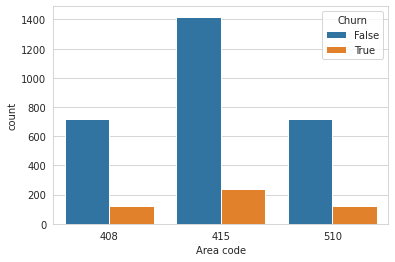

In [61]:
#To find relation of churn area wise
sns.set_style('whitegrid')
ax = sns.countplot(x = 'Area code', hue = 'Churn', data = tele_churn_df)
plt.show()

##It is pretty obvious from the preceding plot that the churn rate is about the same. Therefore, it is difficult to see how they are related.

#***International Plan***

In [62]:
# calculate count of customer with and without international plan
tele_churn_df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

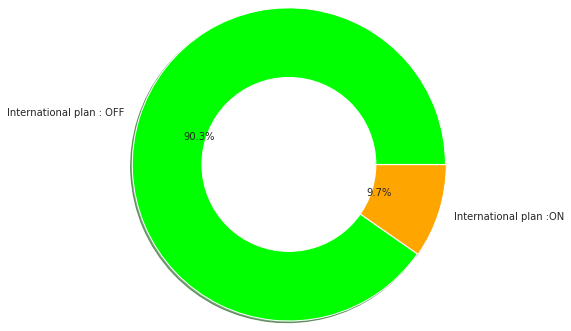

In [63]:
# donut chart of customer with international plan ON/OFF
data = tele_churn_df['International plan'].value_counts()
explode = (0,0.01)
plt.pie(data,explode = explode,autopct = '%1.1f%%', shadow = True, radius = 1.8,
        labels= ['International plan : OFF','International plan :ON'],
        colors = ['lime','orange'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

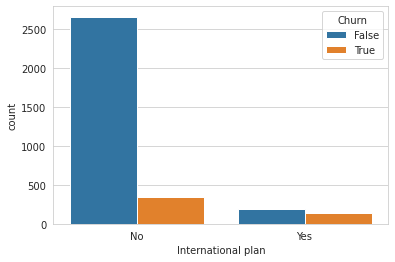

In [64]:
#Analysing by using count plot
sns.set_style('whitegrid')
ax = sns.countplot(x = 'International plan', hue = 'Churn', data = tele_churn_df)
plt.show()

In [65]:
# percentage of customer who churned with respect to total no of cusmtomers witn international plan ON & OFF
Internationalplan = pd.crosstab(tele_churn_df['International plan'],tele_churn_df['Churn'])
Internationalplan['Churn_%'] = Internationalplan.apply(lambda x : x[1]*100/(x[0]+x[1]),
                                         axis = 1)
print(Internationalplan)

Churn               False  True    Churn_%
International plan                        
No                   2664   346  11.495017
Yes                   186   137  42.414861


#According to the above data, 42.4% of customers with overseas plans churn. This may be caused by high fees or connectivity problems. Since customers already pay more for international calls than regular domestic calls, connectivity problems are likely to make customers dissatisfied, which promotes customer churn.

#***Account Length***

In [66]:
#creat two separate dataset for churned and not churned customer
churn_cust_df = tele_churn_df[tele_churn_df["Churn"] == bool(True)]
not_churn_cust_df = tele_churn_df[tele_churn_df["Churn"] == bool(False)]

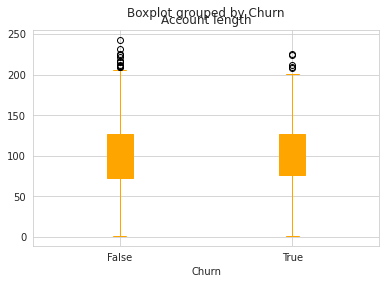

In [67]:
#Box Plot for Account Length Attribute
tele_churn_df.boxplot(column="Account length",by='Churn', color = 'orange',patch_artist=True)
plt.show()

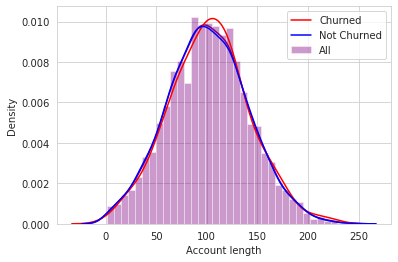

In [68]:
#comparison of churned Account Length and not churned Account Length
sns.distplot(tele_churn_df["Account length"], color = 'purple', label = 'All')
sns.distplot(churn_cust_df['Account length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_cust_df['Account length'],color = 'blue', label = 'Not Churned',hist = False)
plt.legend()

##From above, There is no relationship between the (churn) column and (account length)

#***Call minutes and Call Charges***

In [69]:
#Find correlation between all column and rows of given dataframe
#Correlation Plot

correlation = tele_churn_df.corr()
correlation.style.background_gradient().set_precision(1)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
Area code,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
Number vmail messages,-0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.1
Total day minutes,0.0,-0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.2
Total day calls,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
Total day charge,0.0,-0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.2
Total eve minutes,-0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.1
Total eve calls,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
Total eve charge,-0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.1
Total night minutes,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0


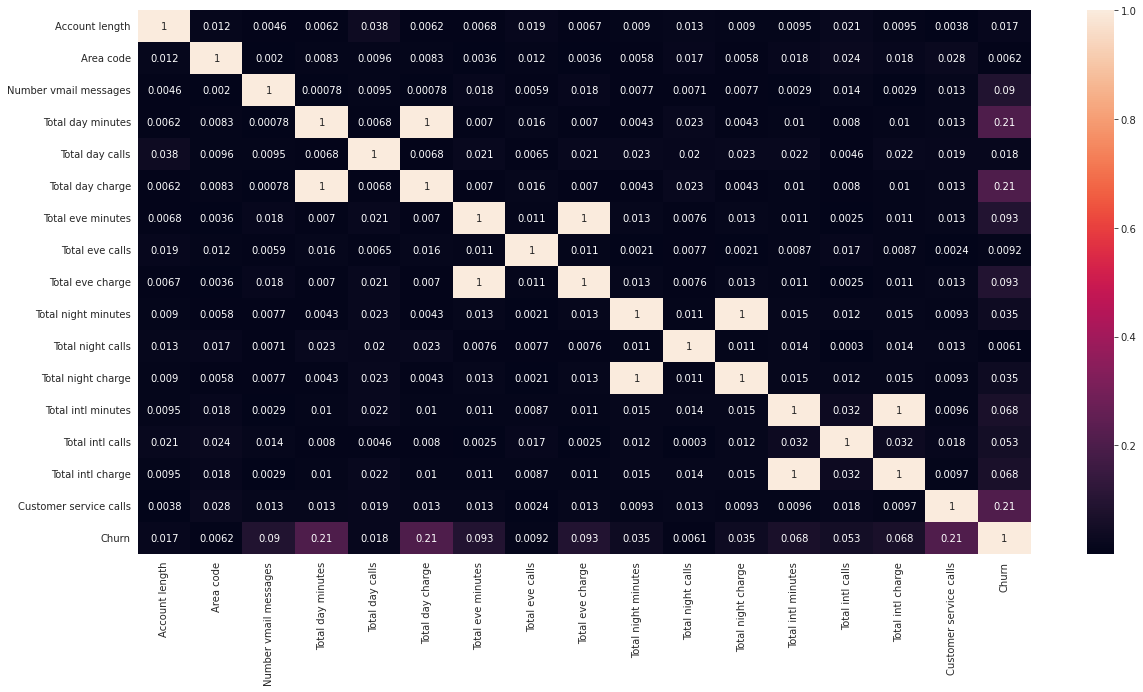

In [70]:
#above data can also be displayed in more detailed and colorful way by below code
plt.figure(figsize=(20,10))
churn_heatmap = tele_churn_df.corr()
sns.heatmap(abs(churn_heatmap),annot = True)

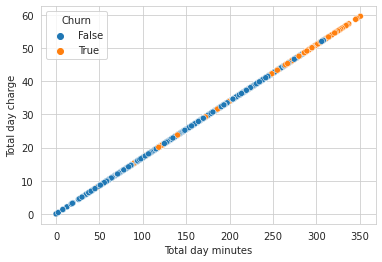

In [71]:
sns.scatterplot(x='Total day minutes', y = 'Total day charge', hue = 'Churn',
                data = tele_churn_df)
sns.set_style("darkgrid")


#it is evident from the graph that there exists a really perfect linear relationship between minutes and its corresponding rate, which is obvious,also maximum churned customer seems to have spent extra minute on call

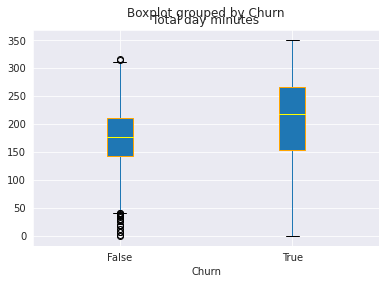

In [72]:
#Boxed plot for total day minutes grouped by churn
tele_churn_df.boxplot(column = 'Total day minutes', by='Churn',patch_artist=True,boxprops=dict(color='orange'),medianprops=dict(color='yellow'))
plt.show()

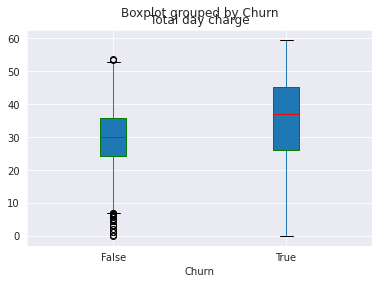

In [73]:
#Box plot for customer service calls attribute
tele_churn_df.boxplot(column = 'Total day charge', by = 'Churn', patch_artist=True,boxprops=dict(color='green'),medianprops=dict(color='red'))


#Since total day minute is directly proportional to total day charge , as the day minutes increases total charge increases ,it seems that the churned customers where the ones with higher total day minutes and charges .
#May be customers with higher usage couldn't bear the high tariff and hence churned .

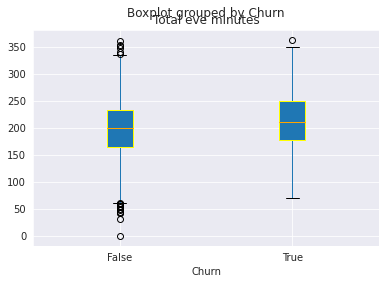

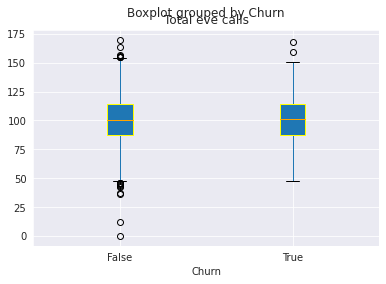

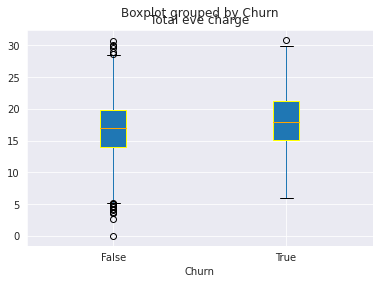

In [74]:
# for evening minutes , no. of calls, and charges .
tele_churn_df.boxplot(column='Total eve minutes',by='Churn',patch_artist=True,boxprops=dict(color='yellow'),medianprops=dict(color='orange'))
tele_churn_df.boxplot(column='Total eve calls',by='Churn',patch_artist=True,boxprops=dict(color='yellow'),medianprops=dict(color='orange'))
tele_churn_df.boxplot(column='Total eve charge',by='Churn',patch_artist=True,boxprops=dict(color='yellow'),medianprops=dict(color='orange'))

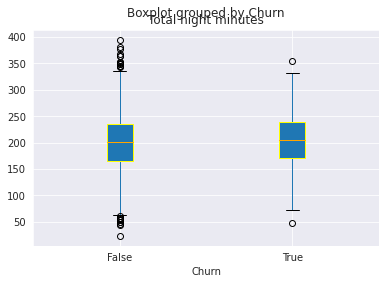

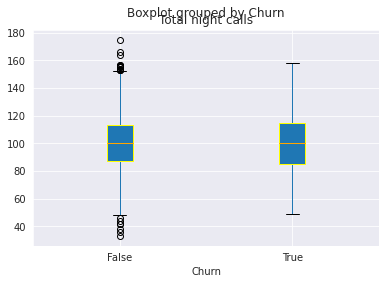

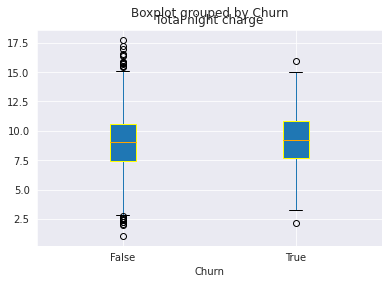

In [75]:
# for night minutes , no. of calls, and charges .
tele_churn_df.boxplot(column='Total night minutes',by='Churn',patch_artist=True,boxprops=dict(color='yellow'),medianprops=dict(color='orange'))
tele_churn_df.boxplot(column='Total night calls',by='Churn',patch_artist=True,boxprops=dict(color='yellow'),medianprops=dict(color='orange'))
tele_churn_df.boxplot(column='Total night charge',by='Churn',patch_artist=True,boxprops=dict(color='yellow'),medianprops=dict(color='orange'))

<Figure size 1224x72 with 0 Axes>

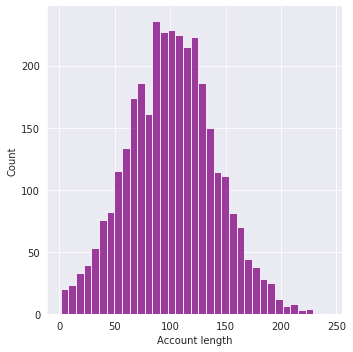

<Figure size 1224x72 with 0 Axes>

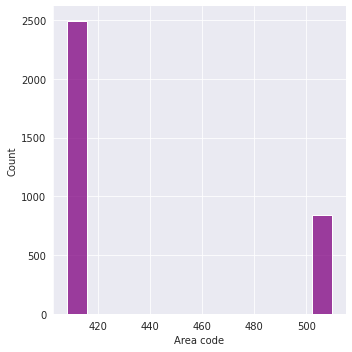

<Figure size 1224x72 with 0 Axes>

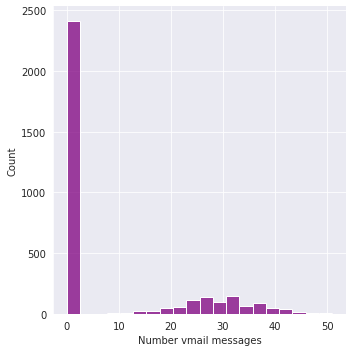

<Figure size 1224x72 with 0 Axes>

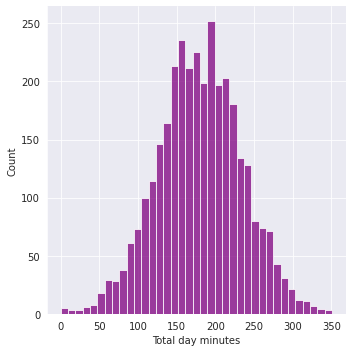

<Figure size 1224x72 with 0 Axes>

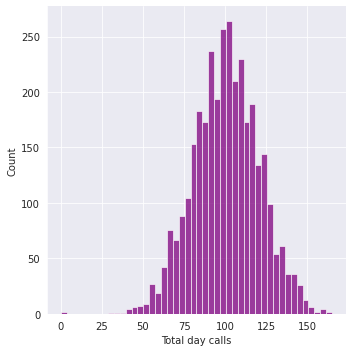

<Figure size 1224x72 with 0 Axes>

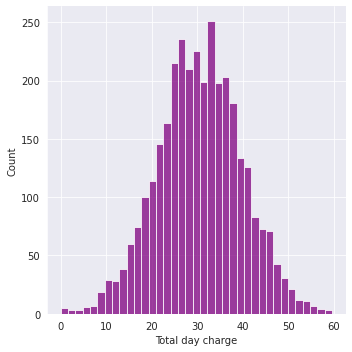

<Figure size 1224x72 with 0 Axes>

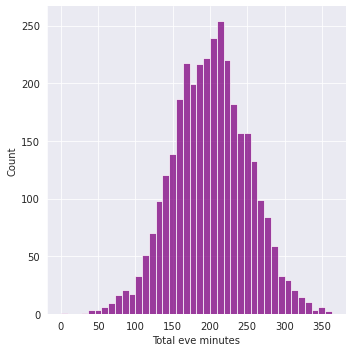

<Figure size 1224x72 with 0 Axes>

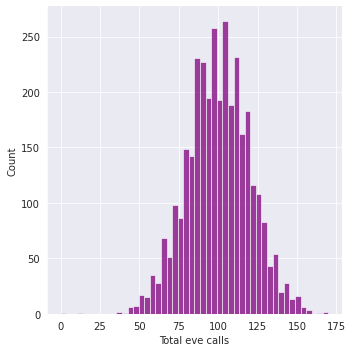

<Figure size 1224x72 with 0 Axes>

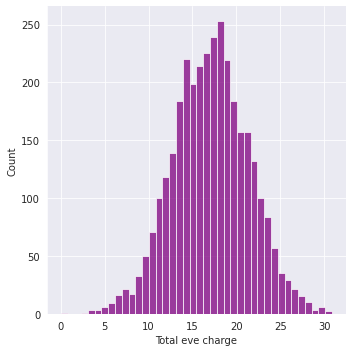

<Figure size 1224x72 with 0 Axes>

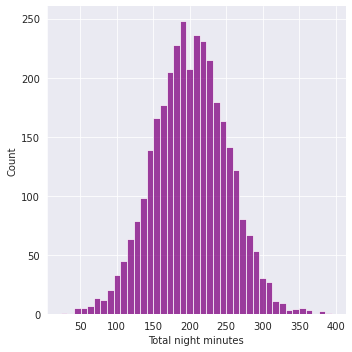

<Figure size 1224x72 with 0 Axes>

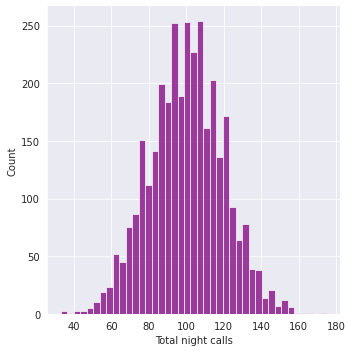

<Figure size 1224x72 with 0 Axes>

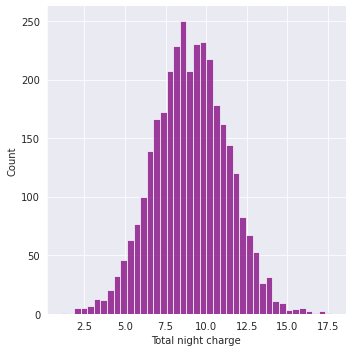

<Figure size 1224x72 with 0 Axes>

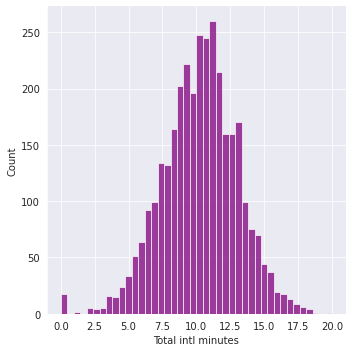

<Figure size 1224x72 with 0 Axes>

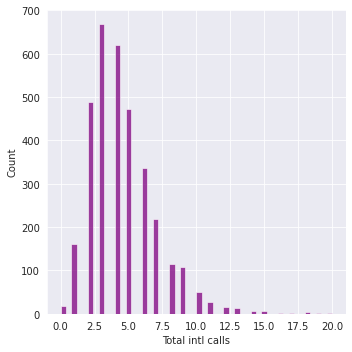

<Figure size 1224x72 with 0 Axes>

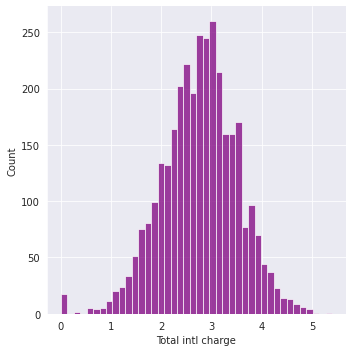

<Figure size 1224x72 with 0 Axes>

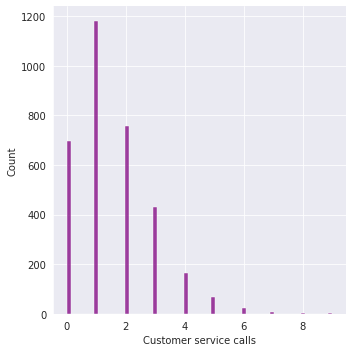

In [76]:
columnplot=tele_churn_df.select_dtypes(exclude=['object','bool'])
for column in columnplot:
        plt.figure(figsize=(17,1))
        sns.displot(data=columnplot, x=column, color='purple')
plt.show()

#Charges for Each different minutes (Day, Evening, Night, international)

In [77]:
#calculate charges for each kind of mins:
day_minute_charge = tele_churn_df['Total day charge'].mean()/tele_churn_df['Total day minutes'].mean()
eve_minute_charge = tele_churn_df['Total eve charge'].mean()/tele_churn_df['Total eve minutes'].mean()
night_minute_charge = tele_churn_df['Total night charge'].mean()/tele_churn_df['Total night minutes'].mean()
int_minute_charge= tele_churn_df['Total intl charge'].mean()/tele_churn_df['Total intl minutes'].mean()

In [78]:
print(f' Day_minute_charge: {day_minute_charge} \n eve_minute_charge: {eve_minute_charge} \n night_minute_charge: {night_minute_charge } \n int_minute_charge: {int_minute_charge}')

 Day_minute_charge: 0.17000300739130672 
 eve_minute_charge: 0.08500104871485778 
 night_minute_charge: 0.04500041448440008 
 int_minute_charge: 0.2700500279887107


#***Voice Mail Plan***

In [79]:
#churn rate for customer with and without voice mail paln
Voice_mail = pd.crosstab(tele_churn_df['Voice mail plan'],tele_churn_df['Churn'])
Voice_mail['Churn_%'] = Voice_mail.apply(lambda x : x[1]*100/(x[0]+x[1]),
                                         axis = 1)
print(Voice_mail)

Churn            False  True    Churn_%
Voice mail plan                        
No                2008   403  16.715056
Yes                842    80   8.676790


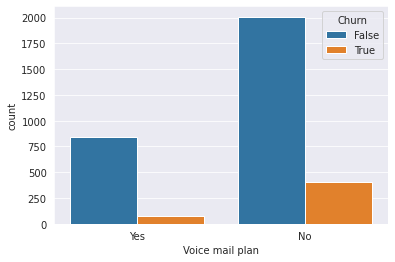

In [80]:
'''Detailed plot of churned and non churned customer vs. customer with voice 
mail plan ''' 
sns.countplot(x = 'Voice mail plan', hue= 'Churn', data= tele_churn_df)
plt.show()

##As you can see, there is no obvious connection between the voice mail plan customers and the churners.

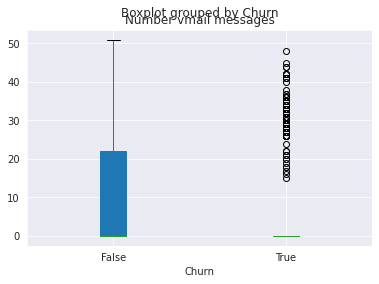

In [81]:
tele_churn_df.boxplot(column="Number vmail messages",by='Churn',patch_artist=True)
plt.show()

In [82]:
#seeing that in above boxplot is form of hard to understand the no. of voice mails Vs. churned customers values
# we can use describe approach to have a detailed look over it.  
churn_cust_df= tele_churn_df[tele_churn_df['Churn']== bool(True)]
churn_cust_df['Number vmail messages'].mean()
churn_cust_df['Number vmail messages'].describe()

count    483.000000
mean       5.115942
std       11.860138
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       48.000000
Name: Number vmail messages, dtype: float64

In [83]:
not_churn_cust_df = tele_churn_df[tele_churn_df["Churn"] == bool(False)]
not_churn_cust_df['Number vmail messages'].describe()

count    2850.000000
mean        8.604561
std        13.913125
min         0.000000
25%         0.000000
50%         0.000000
75%        22.000000
max        51.000000
Name: Number vmail messages, dtype: float64

##From above boxplot we are able to analyze that customer those who churned has less no. of voice mail compared to the not churned ones.


#***Customer service calls*** 

In [84]:
# Customer Service Calls 
pd.crosstab(tele_churn_df['Churn'], tele_churn_df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


In [85]:
#churn rate with respect to no .of customer service calls.
Customer_service_call = pd.crosstab(tele_churn_df['Customer service calls'],tele_churn_df["Churn"])
Customer_service_call['Churn_%'] = Customer_service_call.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_call)

Churn                   False  True     Churn_%
Customer service calls                         
0                         605    92   13.199426
1                        1059   122   10.330229
2                         672    87   11.462451
3                         385    44   10.256410
4                          90    76   45.783133
5                          26    40   60.606061
6                           8    14   63.636364
7                           4     5   55.555556
8                           1     1   50.000000
9                           0     2  100.000000


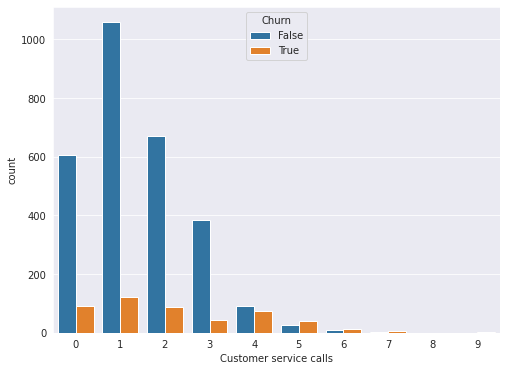

In [86]:
# Histogram of Customer Serice calls grouped by churn  
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x="Customer service calls", hue='Churn', data=tele_churn_df);

#It may be said that the churn rate increases from 4 calls to the service center. customers who've known as customer support 3 or fewer times have a markedly lower churn price than that of customers who have known as customer service 4 or greater instances.


#***CONCLUSION:***

##**From the above exploratory data analysis these are the subsequent conclusions that can be incurred**:
##* Some states have higher churn rate than other, for which network issues could be the reason because if the contender company had low tariff for calls also utmost of the states would have shown the appprox same churn rate
##* Customers with international plan ON has higher churn rate compared to customerswith international plan OFF , this could be because the customer could be unhappy with the high tariff cost or network issues.
##* Area and Account length has no relation with churn rate, hence this columns can be neglected or it can be said that the data is superfluous
##* Customers with higher day call mins has higher churn rate compared to other, could be because of the higher charges which is relatively obvious, frequent caller might have introduce some other company offering low tariff.
##* With other varaibles like as evening, night calls no relation could be found
##* It could be seen that customers with vmails more than 20 (approx.) has higher churn rate
##* The churn rate increases as the call to the service center increases. Customers who have called customer service three or lesser times have a markedly lesser churn rate than that of customers who have called customer service four or more times.

# ***Reccomendations :***

##* They should enhance in covrage area and cracking network issues( both domestic as well as international)
##* Give discount or produce a plan in which as the day call mins increases above certain level the charges( i.e. the tariff per min) drop, means they're charged lower as compared to normal per min tariff.
##* Decrease the interational plan tariff or provide with a few discounts
##* They can provide better customer service and offer higher problem solution, additionally take their feedback and work at the feedback recommended by the customers


